# Hack the Feed: Insights from Social Media Data

**Author:** Aregbesola Samuel

Playhouse Communication stands as a prominent digital marketing agency in Nigeria, known for merging design and media strategy with state-of-the-art technological innovations to transform the landscape of marketing. Their clientele includes both international industry giants and agile small to medium-sized enterprises, all of whom are reshaping their respective fields.

In this project we will try to generate game-changing insights for a high-profile client using exclusive social media data. 

This python workbook contains codes used to clean and preprocess the datasets for analysis.

In [1]:
# Additional libraries installs
# %pip install missingno

In [2]:
# imports
import pandas as pd # library for data manipulation and analysis
import numpy as np # library for scientific computing
import matplotlib.pyplot as plt # library for visualizing data
import seaborn as sns # library for visualizing data
import missingno as msno # library for visualizing missing values

import warnings # library to ignore warnings
warnings.filterwarnings('ignore')

# set option to display all the columns of the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# import helper functions
from helper_functions import cleaning_functions

In [4]:
# import data
facebook = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv')
instagram = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv')
linkedin = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv')
twitter = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')

In [5]:
# Check dataframe dimensions
def print_df_shapes(dfs):
    for name, df in dfs.items():
        print(f"{name} ({df.shape[0]}, {df.shape[1]})")

# dataframes dictionary
dataframes = {'facebook': facebook, 'instagram': instagram, 'linkedin': linkedin, 'twitter': twitter}

print_df_shapes(dataframes)


facebook (9803, 147)
instagram (10000, 147)
linkedin (7760, 147)
twitter (8529, 147)


In [6]:
# Create a copy of the dataframes
facebook_copy = facebook.copy()
instagram_copy = instagram.copy()
linkedin_copy = linkedin.copy()
twitter_copy = twitter.copy()

---
## Data Cleaning

In this section, we will try to fix quality issues including but not limited to 

1. Dropping columns where 80% of observations are missing/null because they are not useful for the analysis.
2. Check for duplicates
3. Fix issues with missing observations
4. Fix issues with wrong datatypes
5. Fix issues with inconsistent / wrong formatting

The cleaning will be split into two: 

1 and 2 can be fixed for all dataframes at once. 

3-5 will be carried out for each dataframe individually.


### General cleaning

In [7]:
# setup cleaning functions
fb_clean = cleaning_functions(facebook)
ig_clean = cleaning_functions(instagram)
link_clean = cleaning_functions(linkedin)
tw_clean = cleaning_functions(twitter)

In [8]:
# delete rows with missing values >= 80 %
facebook = fb_clean.delete_80_null()
instagram = ig_clean.delete_80_null()
linkedin = link_clean.delete_80_null()
twitter = tw_clean.delete_80_null()

In [9]:
# dataframes dictionary
dataframes = {'facebook': facebook, 'instagram': instagram, 'linkedin': linkedin, 'twitter': twitter}

# check dataframe shapes
print_df_shapes(dataframes)

facebook (9803, 57)
instagram (10000, 20)
linkedin (7760, 21)
twitter (8529, 34)


In [10]:
# check for duplicate rows
print('Facebook: ', fb_clean.check_duplicates())
print('Instagram: ', ig_clean.check_duplicates())
print('Linkedin: ', link_clean.check_duplicates())
print('Twitter: ', tw_clean.check_duplicates())

Facebook:  Total number of duplicate rows: 0
Instagram:  Total number of duplicate rows: 0
Linkedin:  Total number of duplicate rows: 0
Twitter:  Total number of duplicate rows: 0


### Facebook cleaning

In [11]:
# check missing values
fb_clean.check_missing_values()

,Post Photo View Clicks,Unique Post Photo View Clicks,Engagement Rate (per Reach),Engagement Rate (per Impression),Unique Post Clicks,Unique Answers,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Unique Other Post Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Engagements,Unique Negative Feedback,Paid Impressions,Non-fan Impressions,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Paid Reach,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Linked Content,Post,Content Type,Network,Post Type,Post ID,Profile,Sent by,Link,Date
Total,2122.00,2122.00,2062.00,2059.0,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,910.00,341.00,250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,21.65,21.65,21.03,21.0,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,9.28,3.48,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# examine datatypes
fb_clean.check_datatypes()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback
0,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,float64,object,object,float64,object,object,object,object,float64,object,float64,object,object,object,object,object,float64,float64,float64,float64,float64,object,float64,object,object,object,object,float64,float64,object,object,object,object,float64,float64,float64,object,object,object,float64


#### List of Quality Issues

* 49 columns have missing values
* 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)' & 'Click-Through Rate' columns have % sign values
* Several columns have the wrong datatype
    * 30 columns are wrongly labeled as strings instead of numerics.
    * The Date column should be a datetime object
    * 'Sent by' and 'Content Type' columns should be categorical
* Several columns have values are formatted with ',' e.g. '200,000'. This format cannot be converted to numeric without issues. They must be treated while converting datatypes.

* 'Sent by' column has blank values (i.e missing values are filled with space).

---

#### Fixing missing data issues

In [13]:
# Check rows where likes are null.
facebook[facebook['Likes'].isna()].head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback
8893,6/22/2023 10:05 pm,253788558082460_575431431442876,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/photo.php?fbid=575431...,NaN,https://www.facebook.com/StanbicIBTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8894,6/22/2023 10:05 pm,253788558082460_575431438109542,Facebook,Post,Photo,Stanbic IBTC,,https://www.facebook.com/photo.php?fbid=575431...,NaN,https://www.facebook.com/StanbicIBTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Note

43 columns have missing data corresponding to deleted posts (910 observations).

These rows will be deleted.

In [14]:
# Remove rows where Likes are null.
facebook = facebook[~facebook['Likes'].isna()]

##### Missing data heatmap

*"The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:"* [Missingno heatmap](https://github.com/ResidentMario/missingno#heatmap)

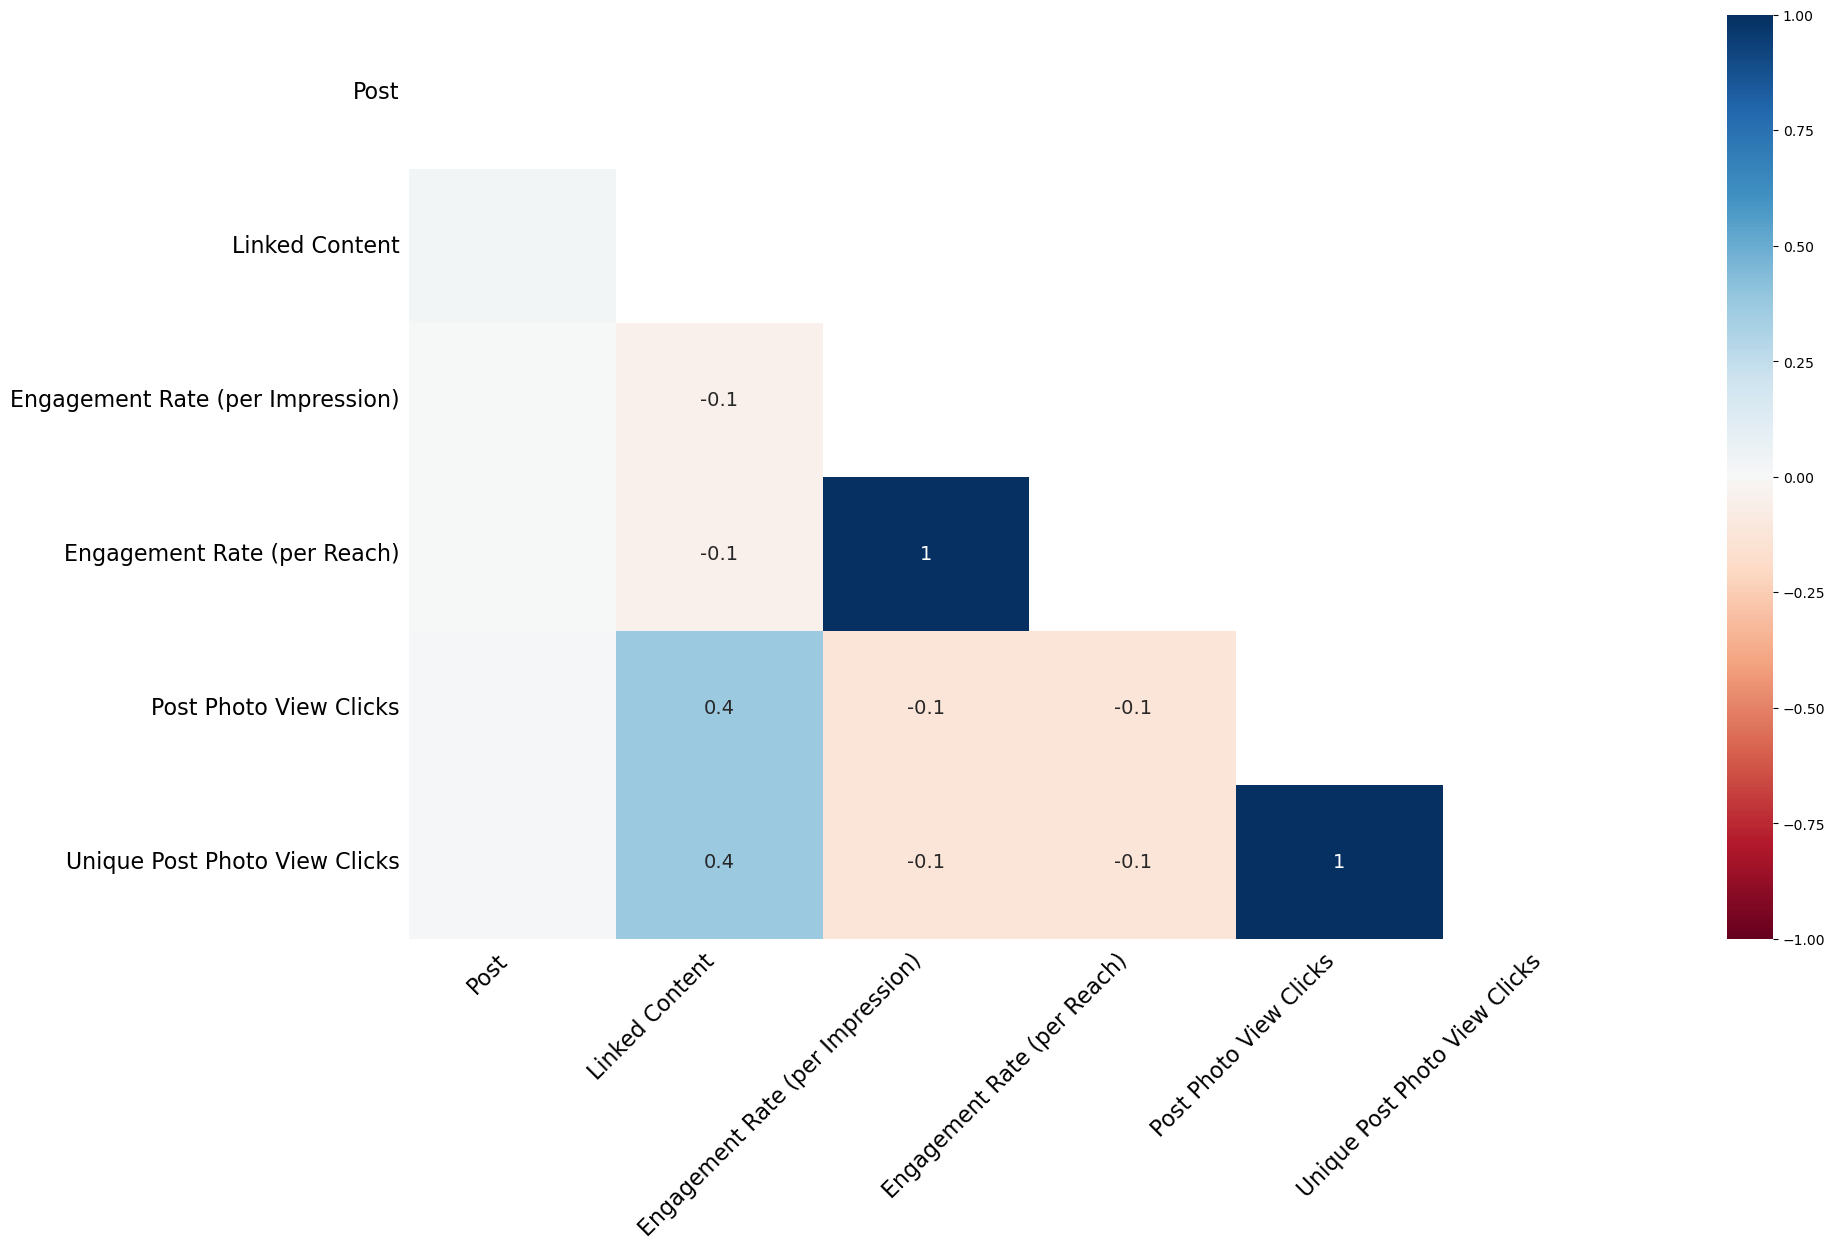

In [15]:
# Check missing data heatmap
msno.heatmap(facebook);

Engagement Rate (per Reach) and Engagement Rate (per Impression) have missing values in the same rows (i.e not missing at random). 

Post Photo View Clicks and Unique Post Photo View Clicks also have missing values in the same rows. 

In [16]:
# Check Engagements, Impressions, and Reach where Engagement Rate (per Reach) is null.   
(facebook[facebook['Engagement Rate (per Impression)'].isna()]
[['Engagements', 'Impressions', 'Reach', 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']])

,Engagements,Impressions,Reach,Engagement Rate (per Impression),Engagement Rate (per Reach)
7711,8,0,0,NaN,NaN
7712,6,0,0,NaN,NaN
7713,13,0,0,NaN,NaN
7717,1,0,0,NaN,NaN
7718,7,0,0,NaN,NaN
...,...,...,...,...,...
8886,56,0.0,0.0,NaN,NaN
8887,333,0.0,0.0,NaN,NaN
8890,24,0.0,0.0,NaN,NaN
8891,138,0.0,0.0,NaN,NaN


##### Note

Missing values in Engagement Rate (per Impression) and Engagement Rate (per Reach) correspond to 0 Impressions or Reach

These values will be imputed with 0

In [17]:
# Impute 0 for missing values in 'Engagement Rate (per Impression)' and 'Engagement Rate (per Reach)' columns
facebook['Engagement Rate (per Impression)'] = facebook['Engagement Rate (per Impression)'].fillna('0')
facebook['Engagement Rate (per Reach)'] = facebook['Engagement Rate (per Reach)'].fillna('0')

In [18]:
# Confirm imputation
facebook[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']].isna().sum()

Engagement Rate (per Impression)    0
Engagement Rate (per Reach)         0
dtype: int64

In [19]:
# Examine missing posts
facebook[facebook['Post'].isna()][['Post', 'Link', 'Content Type']].head(3)

,Post,Link,Content Type
41,NaN,https://www.facebook.com/StanbicIBTC/photos/a....,Photo
42,NaN,https://www.facebook.com/StanbicIBTC/photos/a....,Photo
96,NaN,https://www.facebook.com/StanbicIBTC/photos/a....,Photo


##### Note

Posts with missing values do not have text content

They are mostly media content (especially photos)

These values will be imputed with blank space instead.

In [20]:
# fill missing values in 'Post' column with values in ''
facebook['Post'] = facebook['Post'].fillna('no post')

In [21]:
# Confirm imputation
facebook['Post'].isna().sum()

0

---
#### Additional columns to be dropped


In [22]:
# Find columns where all values are 0
zero_columns = list(facebook.columns[facebook.isin([0]).all()])

zero_columns

['Paid Impressions',
 'Fan Paid Impressions',
 'Non-fan Paid Impressions',
 'Paid Reach',
 'Fan Paid Reach']

In [23]:
# Check content type where 'Post Photo View Clicks' are null
(facebook[facebook['Post Photo View Clicks'].isna()])['Content Type'].value_counts()

Video    906
Text     237
Link      69
Name: Content Type, dtype: int64

In [24]:
print(facebook['Post Type'].value_counts(), '\n')
print(facebook['Profile'].value_counts(), '\n')

Post    8893
Name: Post Type, dtype: int64 

Stanbic IBTC    8893
Name: Profile, dtype: int64 



##### Note

* **'Post ID'**: There is no reason to track individual posts in this analysis.
* **'Post Type', 'Profile**: Redundant Information
* **Link, 'Linked Content'**: The actual links to facebook posts are not needed for analysis
* **'Paid Impressions', 'Fan Paid Impressions', 'Non-fan Paid Impressions', 'Paid Reach','Fan Paid Reach'**: All values are 0
* **'Post photo View Clicks' and 'Unique Post Photo View Clicks'**:  are not needed for the analysis

In [25]:
# Drop additional columns 
cols = ['Post ID', 'Post Type', 'Profile','Link', 'Linked Content','Paid Impressions',
'Fan Paid Impressions', 'Non-fan Paid Impressions', 'Paid Reach','Fan Paid Reach',
'Post Photo View Clicks','Unique Post Photo View Clicks']

facebook = facebook.drop(cols, axis=1)

In [26]:
# check missing values
pd.DataFrame(facebook.isna().sum()).sort_values(by=0, ascending=False).T

,Date,Love Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Other Post Clicks,Haha Reactions,Likes,Network,Reactions,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Fan Organic Impressions,Non-fan Impressions,Non-fan Organic Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Fan Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Unique Negative Feedback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---
#### Fix issues with 'Engagement Rate (per impression)', 'Engagement Rate (per Reach)' & 'Click-Through Rate'

In [27]:
# Remove % sign from 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)' & 'Click-Through Rate' columns
facebook['Engagement Rate (per Impression)'] = facebook['Engagement Rate (per Impression)'].str.replace('%', '')
facebook['Engagement Rate (per Reach)'] = facebook['Engagement Rate (per Reach)'].str.replace('%', '')
facebook['Click-Through Rate'] = facebook['Click-Through Rate'].str.replace('%', '')

In [28]:
# Confirm changes
facebook[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)', 'Click-Through Rate']].head()

,Engagement Rate (per Impression),Engagement Rate (per Reach),Click-Through Rate
0,0.49,0.49,0
1,4.67,6.39,0
2,5.29,5.62,0
3,0.56,0.57,0
4,6.16,6.39,0


---
#### Fix issues with wrong data types

In [29]:
# convert "Date" column to datetime
facebook['Date'] = pd.to_datetime(facebook['Date'])

In [30]:
# List of columns to convert to numeric
numeric_columns =  ['Impressions', 'Organic Impressions', 'Viral Impressions', 'Non-viral Impressions',
        'Fan Impressions', 'Fan Organic Impressions', 'Non-fan Impressions','Non-fan Organic Impressions',
        'Reach', 'Organic Reach', 'Viral Reach', 'Non-viral Reach', 'Fan Reach', 'Engagement Rate (per Impression)',
        'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes', 'Comments', 'Click-Through Rate',
        'Other Post Clicks', 'Post Clicks (All)', 'Engaged Users', 'Engaged Fans',
        'Users Talking About This', 'Unique Reactions', 'Unique Post Clicks', 'Unique Other Post Clicks',
       ]

In [31]:
# Convert columns to numeric data type
facebook[numeric_columns] = facebook[numeric_columns].applymap(lambda x: float(str(x).replace(',', '')))

In [32]:
# Convert 'Sent by' and 'Content type' columns to categorical data type
facebook['Sent by'] = facebook['Sent by'].astype('category')
facebook['Content Type'] = facebook['Content Type'].astype('category')

In [33]:
# Examine datatypes
pd.DataFrame(facebook.dtypes).T

,Date,Network,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Fan Organic Impressions,Non-fan Impressions,Non-fan Organic Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Fan Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Other Post Clicks,Unique Negative Feedback
0,datetime64[ns],object,category,category,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


---

#### Fix issues with 'Sent by' blank spaces

In [34]:
pd.DataFrame(facebook['Sent by'].value_counts())

,Sent by
,6252
Damilare Oyekanmi,1650
Aramide Salami,371
Blessing Ubah,323
Sophia Amuka,209
Kemi Amoo,48
Dunni Ogunsanya,40


In [35]:
# Replace blank space with 'Unknown' in 'Sent by' column
facebook['Sent by'] = facebook['Sent by'].replace(' ', 'Unknown')

In [36]:
# Confirm changes
pd.DataFrame(facebook['Sent by'].value_counts())

,Sent by
Unknown,6252
Damilare Oyekanmi,1650
Aramide Salami,371
Blessing Ubah,323
Sophia Amuka,209
Kemi Amoo,48
Dunni Ogunsanya,40


In [37]:
# save cleaned data to csv
facebook.to_csv('./data/facebook_clean.csv', index=False)

---
### Twitter cleaning

In [38]:
# Examine datatypes
pd.DataFrame(twitter.dtypes).T

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
0,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,float64,object,object,object,float64,object,float64,object,float64,float64,float64,float64,float64,object


In [39]:
# Check missing values
pd.DataFrame(twitter.isna().sum()).sort_values(by=0, ascending=False).T

,Click-Through Rate,Post Link Clicks,Linked Content,Post Hashtag Clicks,Post Media Clicks,Media Views,Engagement Rate (per Impression),Follows from Post,App Opens,App Install Attempts,App Engagements,Other Engagements,Profile Clicks,Shares,Post Detail Expand Clicks,Post Clicks (All),Other Post Clicks,Unfollows from Post,Comments,Likes,Reactions,Engagements,Organic Impressions,Impressions,Potential Reach,Link,Post ID,Post,Sent by,Profile,Content Type,Post Type,Network,Date
0,4916,4916,3551,2632,1836,1831,688,687,687,687,687,687,687,687,687,687,687,687,687,687,687,687,687,687,80,48,0,0,0,0,0,0,0,0


#### List of Quality Issues

* 'Engagement Rate (per Impression)' & 'Click-Through Rate' columns have % sign values
* Several columns have the wrong datatype
    * 15 columns are wrongly labeled as strings instead of numerics.
    * The Date column should be a datetime object
    * 'Sent by' and 'Content Type' columns should be categorical


* Several columns have values are formatted with ',' e.g. '200,000'. This format cannot be converted to numeric without issues. They must be treated while converting datatypes.
* Several columns have missing values
* 'Sent by' column has blank values (i.e missing values are filled with space).
---

#### Fix issues with Engagement Rate (per impression) and 'Click-Through Rate' formatting

In [40]:
# Remove % sign from 'Engagement Rate (per Impression)', 'Click-Through Rate' columns
twitter['Engagement Rate (per Impression)'] = twitter['Engagement Rate (per Impression)'].str.replace('%', '')
twitter['Click-Through Rate'] = twitter['Click-Through Rate'].str.replace('%', '')

In [41]:
# Confirm changes
twitter[['Engagement Rate (per Impression)', 'Click-Through Rate']].sample(2)

,Engagement Rate (per Impression),Click-Through Rate
779,5.44,0.17
8463,NaN,NaN


---
#### Fix issues with wrong data types

In [42]:
# convert "Date" column to datetime
twitter['Date'] = pd.to_datetime(twitter['Date'])

In [43]:
# Columns to be converted to numeric
numeric_columns = ['Impressions', 'Organic Impressions', 'Potential Reach',
                    'Engagement Rate (per Impression)', 'Engagements', 'Reactions',
                    'Likes', 'Shares', 'Click-Through Rate', 'Other Post Clicks',
                    'Post Clicks (All)', 'Post Media Clicks', 'Post Detail Expand Clicks',
                    'Other Engagements', 'Media Views']

In [44]:
# Convert columns to numeric data type
twitter[numeric_columns] = twitter[numeric_columns].applymap(lambda x: float(str(x).replace(',', '')))

In [45]:
# Convert 'Sent by' and 'Content type' columns to categorical data type
twitter['Sent by'] = twitter['Sent by'].astype('category')
twitter['Content Type'] = twitter['Content Type'].astype('category')

In [46]:
# Examine datatypes
pd.DataFrame(twitter.dtypes).T

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
0,datetime64[ns],int64,object,object,category,object,category,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


---

#### Fix issues with 'Sent by' blank spaces

In [47]:
pd.DataFrame(twitter['Sent by'].value_counts())

,Sent by
,4240
Sophia Amuka,3250
Aramide Salami,541
Blessing Ubah,251
Kemi Amoo,92
Dunni Ogunsanya,76
Damilare Oyekanmi,71
Patience Nnaji,3
Lilian Ibekwe,2
Kanayo Obiano,1


In [48]:
# Replace blank space with 'Unknown' in 'Sent by' column
twitter['Sent by'] = twitter['Sent by'].replace(' ', 'Unknown')

In [49]:
# Confirm changes
pd.DataFrame(twitter['Sent by'].value_counts())

,Sent by
Unknown,4240
Sophia Amuka,3250
Aramide Salami,541
Blessing Ubah,251
Kemi Amoo,92
Dunni Ogunsanya,76
Damilare Oyekanmi,71
Patience Nnaji,3
Lilian Ibekwe,2
Kanayo Obiano,1


---
#### Fix issues with missing values

In [50]:
# Check rows where impressions is null
twitter[twitter['Impressions'].isnull()].head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
38,2023-07-05 11:02:00,1676531875987456005,Twitter,Tweet,Link,'@StanbicIBTC,Unknown,https://twitter.com/StanbicIBTC/status/1676531...,Ladies At The Table Series (LATTES) 3.0 https:...,https://twitter.com/i/broadcasts/1MYGNgnAOkwJw,NaN,NaN,346917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2023-07-03 12:13:00,1675825209150930944,Twitter,Tweet,Photo,'@StanbicIBTC,Unknown,https://twitter.com/StanbicIBTC/status/1675825...,Driving growth beyond borders is what we do.\n...,https://twitter.com/StanbicIBTC/status/1675825...,NaN,NaN,345482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Note:

On careful examination, posts with no impressions correspond to deleted tweets. <br>
This also extends to other columns with a correlation score of 1 in the above heatmap<br> 
The observations will be dropped. 

In [51]:
# Drop rows where impressions are NaN or 0
twitter = twitter[(twitter['Impressions'].notna()) & (twitter['Impressions'] != 0)]

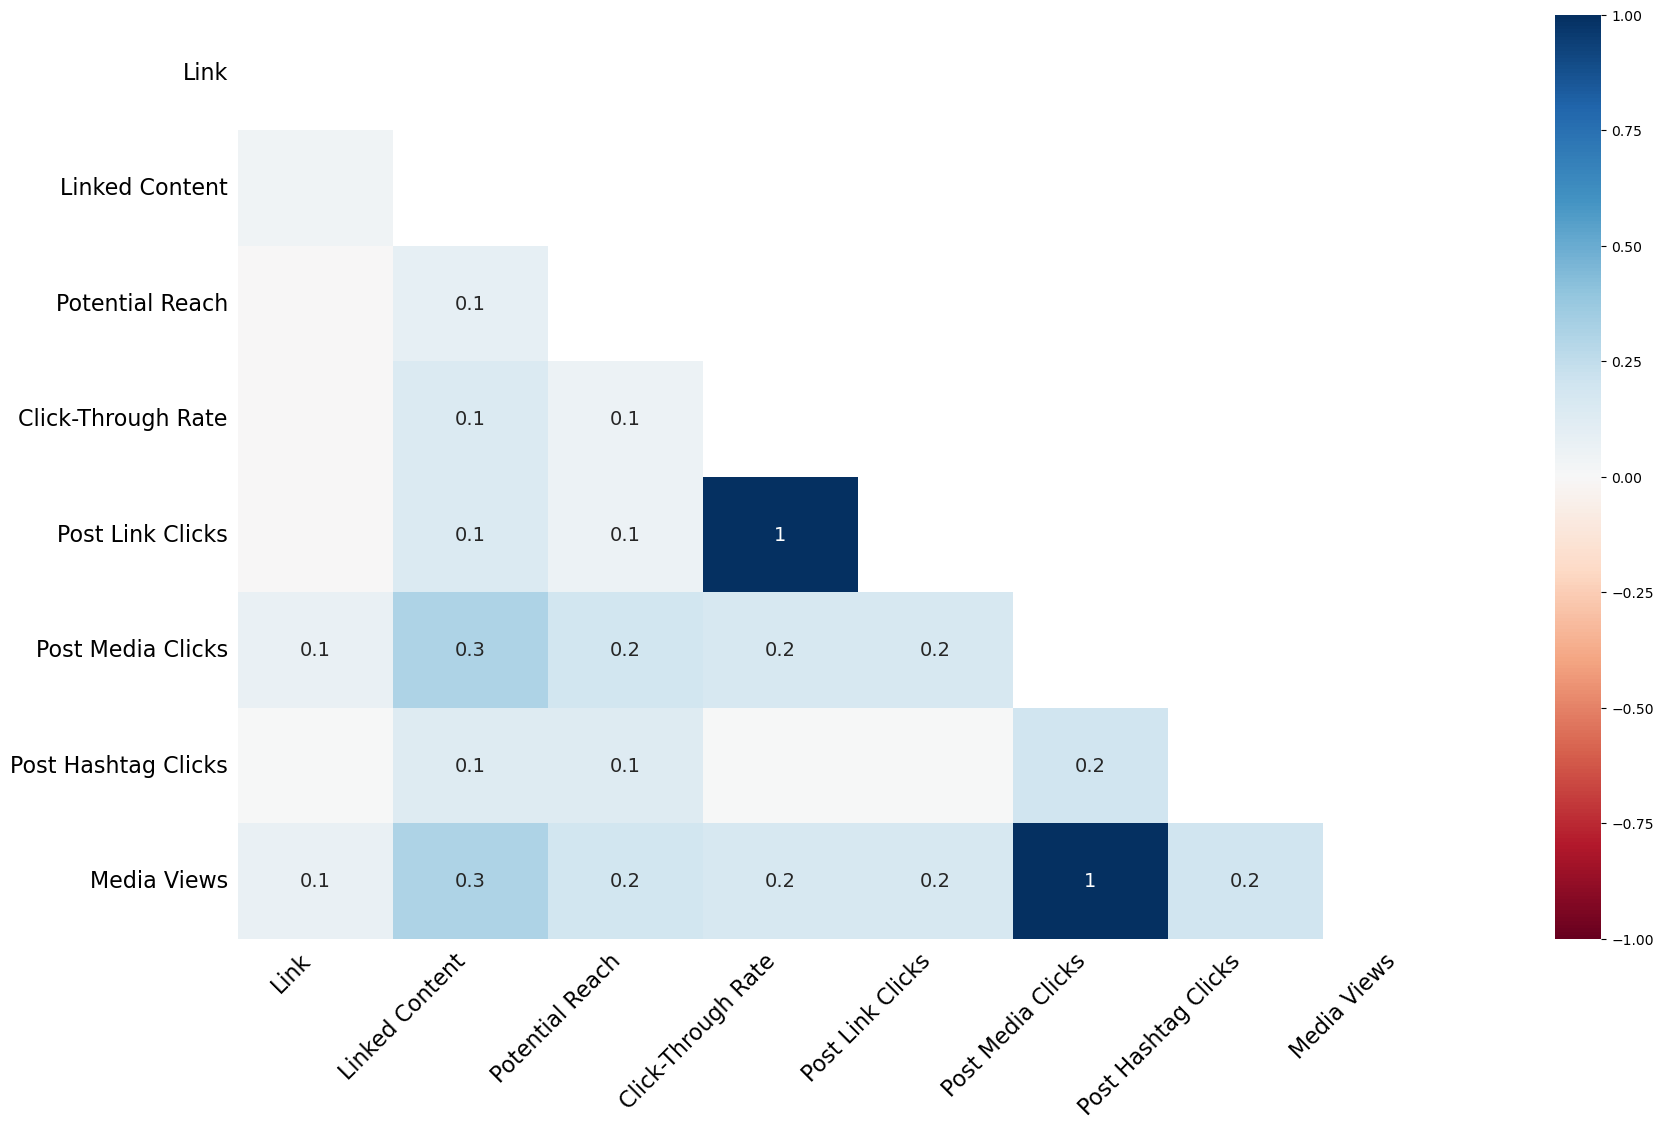

In [52]:
# Check updated missing data heatmap
msno.heatmap(twitter);

##### Note:

As seen above, every "Post Link Click" is associated with the Click-Through Rate (CTR)
$$CTR = \frac{Post Link Clicks}{Impressions} \times 100\%$$

From Twitter's glossary, *"Post Link Clicks" is the number of times people clicked on the links in tweets published by an account during the time frame.*

On further examination, observations with null *"Post Link Clicks"* correspond to posts without links.

However, some posts with external links have *"Post Link Clicks"* of 0 so it might be difficult to just impute missing values with 0.

The steps to impute the missing values include the following:

1. Creating a new binary column named *'Has Link'*.
2. In the *'Has Link'* column, fill in **1** for rows where *"Post Link Clicks"* is not null.
3. Fill in **0** for rows where *"Post Link Clicks"* is null. 
4. Impute **0** for missing values in *"Post Link Clicks"* and *"CTR"* columns.

This way we can analyze CTR for posts containing links.


In [53]:
# Create new column called 'Has Link'
twitter['Has Link'] = twitter['Post Link Clicks'].notna().astype(int)

In [54]:
twitter['Has Link'].value_counts()

0    4228
1    3613
Name: Has Link, dtype: int64

In [55]:
# Impute 0 for missing values in 'Post Link Clicks' and 'CLick-Through Rate' columns
twitter['Post Link Clicks'] = twitter['Post Link Clicks'].fillna(0)
twitter['Click-Through Rate'] = twitter['Click-Through Rate'].fillna(0)

In [56]:
# Check amount of posts without hashtags & missing hashtag clicks
(twitter[
    (~twitter['Post'].str.contains('#\w+'))
    & (twitter['Post Hashtag Clicks'].isna())
])[['Post','Post Hashtag Clicks']].shape[0]


1942

##### Note

Posts with missing 'Post HashTag Clicks' do not have hashtags

Posts with missing 'Media Views' and 'Post Media Clicks' do not contain media content.

These values will be imputed with 0

In [57]:
# Impute missing values in "Media Views", "Post Media Clicks" & "Post Hashtag Clicks" columns with 0
twitter['Media Views'] = twitter['Media Views'].fillna(0)

twitter['Post Media Clicks'] = twitter['Post Media Clicks'].fillna(0)

twitter['Post Hashtag Clicks'] = twitter['Post Hashtag Clicks'].fillna(0)

In [58]:
# Check summary statistics of "Potential Reach" column
pd.DataFrame(twitter['Potential Reach'].describe())

,Potential Reach
count,7.772000e+03
mean,2.848732e+05
std,1.061895e+05
min,0.000000e+00
25%,2.261840e+05
50%,3.052915e+05
75%,3.221885e+05
max,2.194275e+06


##### Note

While the mean is relatively close the median, the maximum value of 2,194,275 denotes the presence of **outliers**.

The standard deviation is also quite large compared to the mean which indicates a high **variability**.

Gven these considerations, the median will be used to impute the missing values of the Potential Reach. 

In [59]:
# Impute missing values in 'Potential Reach' column with median
median = twitter['Potential Reach'].median()
twitter['Potential Reach'] = twitter['Potential Reach'].fillna(median)

----

##### Additional columns to be dropped

* **Post ID**: There is no reason to track individual posts in this analysis.
* **"Post Type", "Profile"**: Redundant Information
* **Link, "Linked Content"**: The actual links to tweets are not needed for analysis
* **"Organic Impressions"**: The "Organic Impressions" column has the same data as the Impressions column
* **"App Engagements", "App Install Attempts", "App Opens"**: These columns are predominantly filled with 0.

In [60]:
print(twitter['Post Type'].value_counts(), '\n')
print(twitter['Profile'].value_counts(), '\n')


print(twitter['App Engagements'].value_counts(), '\n')
print(twitter['App Install Attempts'].value_counts(), '\n')
print(twitter['App Opens'].value_counts(), '\n')

Tweet    7841
Name: Post Type, dtype: int64 

'@StanbicIBTC    7841
Name: Profile, dtype: int64 

0.0    7838
1.0       2
2.0       1
Name: App Engagements, dtype: int64 

0.0    7841
Name: App Install Attempts, dtype: int64 

0.0    7838
1.0       2
2.0       1
Name: App Opens, dtype: int64 



In [61]:
# Drop additional columns 
cols = ['Post ID', 'Post Type', 'Profile',
        'Link', 'Linked Content', 'Organic Impressions',
        'App Engagements', 'App Install Attempts', 'App Opens']

twitter = twitter.drop(cols, axis=1)

In [62]:
#Check missing values
pd.DataFrame(twitter.isna().sum()).sort_values(by=0, ascending=False).T

,Date,Network,Media Views,Unfollows from Post,Follows from Post,Other Engagements,Profile Clicks,Post Detail Expand Clicks,Post Hashtag Clicks,Post Media Clicks,Post Clicks (All),Other Post Clicks,Post Link Clicks,Click-Through Rate,Shares,Comments,Likes,Reactions,Engagements,Engagement Rate (per Impression),Potential Reach,Impressions,Post,Sent by,Content Type,Has Link
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
# save cleaned data to csv
twitter.to_csv('./data/twitter_clean.csv', index=False)

---
### Instagram cleaning

In [64]:
# Examine datatypes
pd.DataFrame(instagram.dtypes).T

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves
0,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64


In [65]:
# Check missing values
pd.DataFrame(instagram.isna().sum()).sort_values(by=0, ascending=False).T

,Engagement Rate (per Reach),Engagement Rate (per Impression),Organic Impressions,Impressions,Organic Reach,Reach,Saves,Post,Link,Sent by,Post ID,Profile,Content Type,Post Type,Network,Engagements,Reactions,Likes,Comments,Date
0,2747,1768,1484,1484,1484,1484,1484,11,0,0,0,0,0,0,0,0,0,0,0,0


#### List of Quality Issues

* **8** columns have missing values
* 'Engagement Rate (per Impression)' & 'Engagement Rate (per Reach)'  columns have % sign values
* Several columns have the wrong datatype
    * 10 columns are wrongly labeled as strings instead of numerics.
    * The Date column should be a datetime object.
    * 'Sent by' and 'Content Type' columns should be categorical.
* Several columns have values are formatted with ',' e.g. '200,000'. This format cannot be converted to numeric without issues. They must be treated while converting datatypes.

* 'Sent by' column has blank values (i.e missing values are filled with space).


---

#### Fixing Missing Data Issues

In [66]:
# Check rows where Impressions are null.
instagram[instagram['Impressions'].isna()].head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves
8516,6/12/2023 1:08 pm,18029321227525834,Instagram,Post,Carousel,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CtY8c1Ts0pP/,"At Stanbic IBTC, we hold special gatherings fo...",NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,0,NaN
8517,6/8/2023 9:55 am,18365455210048288,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CtOTPwcMPZ-/,Motor insurance is required for any ‘Idan’ who...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN


##### Note

5 columns have missing data corresponding to deleted posts (1484 observations).

These rows will be deleted.

In [67]:
# Remove rows where Impressions are null.
instagram = instagram[~instagram['Impressions'].isna()]

In [68]:
# Check Engagements, Impressions, and Reach where Engagement Rate (per Reach) is null.   
(instagram[instagram['Engagement Rate (per Impression)'].isna()]
[['Engagements', 'Impressions', 'Reach', 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']]).head()

,Engagements,Impressions,Reach,Engagement Rate (per Impression),Engagement Rate (per Reach)
7248,5,0,0,NaN,NaN
7249,5,0,0,NaN,NaN
7251,2,0,0,NaN,NaN
7252,2,0,0,NaN,NaN
7253,11,0,0,NaN,NaN


##### Note

Missing values in Engagement Rate (per Impression) and Engagement Rate (per Reach) correspond to 0 Impressions or Reach

These values will be imputed with 0

In [69]:
# Impute 0 for missing values in 'Engagement Rate (per Impression)' and 'Engagement Rate (per Reach)' columns
instagram['Engagement Rate (per Impression)'] = instagram['Engagement Rate (per Impression)'].fillna('0')
instagram['Engagement Rate (per Reach)'] = instagram['Engagement Rate (per Reach)'].fillna('0')

In [70]:
# Confirm imputation
instagram[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']].isna().sum()

Engagement Rate (per Impression)    0
Engagement Rate (per Reach)         0
dtype: int64

In [71]:
# Examine missing posts
instagram[instagram['Post'].isna()][['Post', 'Link', 'Content Type']]

,Post,Link,Content Type
1423,NaN,https://www.instagram.com/tv/CUsLOdsoeK7/,Video
2687,NaN,https://www.instagram.com/tv/Ckqad7iI4Lx/,Video
3037,NaN,https://www.instagram.com/tv/CPnqTksg0xY/,Video
3466,NaN,https://www.instagram.com/p/B4rgFtLFS0Y/,Photo
4057,NaN,https://www.instagram.com/tv/CSMdKslodw-/,Video
4680,NaN,https://www.instagram.com/tv/CXOWnewoDbO/,Video
4721,NaN,https://www.instagram.com/tv/CWGPHnaIN6D/,Video
4881,NaN,https://www.instagram.com/tv/CXlm5xEoRdP/,Video
5297,NaN,https://www.instagram.com/tv/CXlmQIroVuz/,Video


##### Note

Posts with missing values do not have text content

They are all media content (especially videos)

These values will be imputed with blank space instead.

In [72]:
# fill missing values in 'Post' column with values in ''
instagram['Post'] = instagram['Post'].fillna('no post')

In [73]:
# Confirm imputation
instagram['Post'].isna().sum()

0

----

##### Additional columns to be dropped


* **'Post ID'**: There is no reason to track individual posts in this analysis.
* **'Post Type', 'Profile**: Redundant Information
* **Link**: The actual link to instagram posts are not needed for analysis
* **Organic Impressions**: This column has the same data as the Impression column

In [74]:
# Drop additional columns 
cols = ['Post ID', 'Post Type', 'Profile','Link', 'Organic Impressions']

instagram = instagram.drop(cols, axis=1)

In [75]:
# Check missing values
pd.DataFrame(instagram.isna().sum()).sort_values(by=0, ascending=False).T

,Date,Network,Content Type,Sent by,Post,Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---
#### Fix issues with 'Engagement Rate (per impression)', 'Engagement Rate (per Reach)' Formatting

In [76]:
# Remove % sign from 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)' & 'Click-Through Rate' columns
instagram['Engagement Rate (per Impression)'] = instagram['Engagement Rate (per Impression)'].str.replace('%', '')
instagram['Engagement Rate (per Reach)'] = instagram['Engagement Rate (per Reach)'].str.replace('%', '')

In [77]:
# Confirm changes
instagram[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']].head(2)

,Engagement Rate (per Impression),Engagement Rate (per Reach)
0,4.89,5.99
1,6.04,7.04


---
#### Fix issues with wrong data types

In [78]:
# Convert "Date" column to datetime
instagram['Date'] = pd.to_datetime(instagram['Date'])

In [79]:
# List of columns to convert to numeric
numeric_columns =  ['Impressions', 'Reach', 'Organic Reach', 'Engagement Rate (per Impression)',
       'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes', 'Comments']

In [80]:
# Convert columns to numeric data type
instagram[numeric_columns] = instagram[numeric_columns].applymap(lambda x: float(str(x).replace(',', '')))

In [81]:
# Convert 'Sent by' and 'Content type' columns to categorical data type
instagram['Sent by'] = instagram['Sent by'].astype('category')
instagram['Content Type'] = instagram['Content Type'].astype('category')

In [82]:
# Examine datatypes
pd.DataFrame(instagram.dtypes).T

,Date,Network,Content Type,Sent by,Post,Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves
0,datetime64[ns],object,category,category,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


---

#### Fix issues with 'Sent by' blank spaces

In [83]:
pd.DataFrame(instagram['Sent by'].value_counts())

,Sent by
,3544
Blessing Ubah,2668
Aramide Salami,1717
Kemi Amoo,311
Sophia Amuka,190
Damilare Oyekanmi,86


In [84]:
# Replace blank space with 'Unknown' in 'Sent by' column
instagram['Sent by'] = instagram['Sent by'].replace(' ', 'Unknown')

In [85]:
# Confirm changes
pd.DataFrame(instagram['Sent by'].value_counts())

,Sent by
Unknown,3544
Blessing Ubah,2668
Aramide Salami,1717
Kemi Amoo,311
Sophia Amuka,190
Damilare Oyekanmi,86


In [86]:
# save cleaned data to csv
instagram.to_csv('./data/instagram_clean.csv', index=False)

---
### Linkedin cleaning

In [87]:
# Examine datatypes
pd.DataFrame(linkedin.dtypes).T

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags
0,object,int64,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object,object,object


In [88]:
# Check missing values
pd.DataFrame(linkedin.isna().sum()).sort_values(by=0, ascending=False).T

,Tags,Engagement Rate (per Impression),Post Clicks (All),Post Link Clicks,Click-Through Rate,Shares,Comments,Likes,Reactions,Engagements,Organic Impressions,Impressions,Post,Link,Post ID,Sent by,Profile,Content Type,Post Type,Network,Date
0,6120,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,31,4,0,0,0,0,0,0,0


#### List of Quality Issues

* **14** columns have missing values
* 'Engagement Rate (per Impression)' & 'Click-Through Rate' columns have % sign values
* Several columns have the wrong datatype
    * 8 columns are wrongly labeled as strings instead of numerics.
    * The Date column should be a datetime object.
    * 'Sent by' and 'Content Type' columns should be categorical.
* Several columns have values are formatted with ',' e.g. '200,000'. This format cannot be converted to numeric without issues. They must be treated while converting datatypes.
* 'Sent by' column has blank values (i.e missing values are filled with space).

---

#### Fixing Missing Data Issues

In [89]:
# Check rows where Impressions are null.
linkedin[linkedin['Impressions'].isna()].head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags
0,7/13/2023 12:03 pm,7085212016608456704,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,Your money should not be a gamble. Before you ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,7/12/2023 8:00 pm,7084969706025009152,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:...,"What skill (s) do you have, that no one ever t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Note

11 columns have missing data corresponding to deleted posts (1428 observations).

These rows will be deleted.

In [90]:
# Remove rows where Impressions are null.
linkedin = linkedin[~linkedin['Impressions'].isna()]

In [91]:
# Examine missing posts
linkedin[linkedin['Post'].isna()][['Post', 'Link', 'Content Type']].head(4)

,Post,Link,Content Type
151,NaN,https://linkedin.com/feed/update/urn:li:ugcPos...,Text
164,NaN,https://linkedin.com/feed/update/urn:li:ugcPos...,Poll
247,NaN,https://linkedin.com/feed/update/urn:li:share:...,Text
324,NaN,https://linkedin.com/feed/update/urn:li:ugcPos...,Poll


##### Note

Posts with missing values do not have text content. 

While most are shown as text above, they are actually embedded links

These values will be imputed with blank space instead.

Posts with missing tags will also be imputed with blank space.

In [92]:
# fill missing values in 'Post' column with values in ''
linkedin['Post'] = linkedin['Post'].fillna('no post')

In [93]:
# filled missing values in 'Post' column with values in ''
linkedin['Tags'] = linkedin['Tags'].fillna('no tags')

In [94]:
# Confirm imputation
linkedin['Post'].isna().sum()

0

----

##### Additional columns to be dropped


* **'Post ID'**: There is no reason to track individual posts in this analysis.
* **'Post Type', 'Profile**: Redundant Information
* **Link**: The actual link to linkedin posts are not needed for analysis
* **Organic Impressions**: This column has the same data as the Impression column

In [95]:
# Drop additional columns 
cols = ['Post ID', 'Post Type', 'Profile','Link', 'Organic Impressions']

linkedin = linkedin.drop(cols, axis=1)

In [96]:
# Check missing values
pd.DataFrame(linkedin.isna().sum()).sort_values(by=0, ascending=False).T

,Date,Network,Content Type,Sent by,Post,Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---
#### Fix issues with 'Engagement Rate (per impression)', 'Click-Through Rate' Formatting

In [97]:
# Remove % sign from 'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)' & 'Click-Through Rate' columns
linkedin['Engagement Rate (per Impression)'] = linkedin['Engagement Rate (per Impression)'].str.replace('%', '')
linkedin['Click-Through Rate'] = linkedin['Click-Through Rate'].str.replace('%', '')

In [98]:
# Confirm changes
linkedin[['Engagement Rate (per Impression)', 'Click-Through Rate']].head()

,Engagement Rate (per Impression),Click-Through Rate
2,9.52,4.76
3,1.83,1.22
4,5.05,2.13
5,2.04,2.04
6,4.78,2.39


---
#### Fix issues with wrong data types

In [99]:
# Convert "Date" column to datetime
linkedin['Date'] = pd.to_datetime(linkedin['Date'])

In [100]:
# List of columns to convert to numeric
numeric_columns =  ['Impressions', 'Engagement Rate (per Impression)', 'Engagements', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)']

In [101]:
# Convert columns to numeric data type
linkedin[numeric_columns] = linkedin[numeric_columns].applymap(lambda x: float(str(x).replace(',', '')))

In [102]:
# Convert 'Sent by' and 'Content type' columns to categorical data type
linkedin['Sent by'] = linkedin['Sent by'].astype('category')
linkedin['Content Type'] = linkedin['Content Type'].astype('category')

In [103]:
# Examine datatypes
pd.DataFrame(linkedin.dtypes).T

,Date,Network,Content Type,Sent by,Post,Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags
0,datetime64[ns],object,category,category,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object


---

#### Fix issues with 'Sent by' blank spaces

In [104]:
pd.DataFrame(linkedin['Sent by'].value_counts())

,Sent by
Blessing Ubah,2348
,1709
Sophia Amuka,1573
Kemi Amoo,327
Aramide Salami,268
Damilare Oyekanmi,96
Dunni Ogunsanya,11


In [105]:
# Replace blank space with 'Unknown' in 'Sent by' column
linkedin['Sent by'] = linkedin['Sent by'].replace(' ', 'Unknown')

In [106]:
# Confirm changes
pd.DataFrame(linkedin['Sent by'].value_counts())

,Sent by
Blessing Ubah,2348
Unknown,1709
Sophia Amuka,1573
Kemi Amoo,327
Aramide Salami,268
Damilare Oyekanmi,96
Dunni Ogunsanya,11


In [107]:
# save cleaned data to csv
linkedin.to_csv('./data/linkedin_clean.csv', index=False)